In [225]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
# Get the playing history from 11/14/2021 to 11/14/2023
import csv
file_path = './Apple-Music-Play-History-100.csv'

# Read the CSV file directly into a DataFrame
df = pd.read_csv(file_path, delimiter=';')

# Display the DataFrame
display(df)
display(df.info)


,Column1,Track Identifier,Media type,Date Played,Hours,Play Duration Milliseconds,End Reason Type,Source Type,Play Count,Skip Count,Ignore For Recommendations,Track Reference,Track Description
0,Turkey,1487953560,AUDIO,20200101,"11, 14",189089,PLAYBACK_MANUALLY_PAUSED,IPHONE,2,1,False,1.487954e+09,Arizona Zervas - ROXANNE
1,Turkey,1440871952,AUDIO,20200101,12,126913,PLAYBACK_MANUALLY_PAUSED,IPHONE,1,0,False,1.440872e+09,The Weeknd - Sidewalks (feat. Kendrick Lamar)
2,Turkey,1440831286,AUDIO,20200101,10,92639,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,1,1,False,1.440831e+09,Drake - 10 Bands
3,Turkey,327417057,AUDIO,20200101,21,85634,PLAYBACK_MANUALLY_PAUSED,IPHONE,1,0,False,3.274171e+08,Madcon - Beggin (original Version)
4,Turkey,1440883524,AUDIO,20200101,11,56770,PLAYBACK_MANUALLY_PAUSED,IPHONE,1,0,False,1.440884e+09,The Police - Roxanne
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62024,Turkey,587098510,AUDIO,20231114,17,0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,0,1,False,5.870985e+08,Teoman - Güzel Bir Gün
62025,Turkey,1254351757,AUDIO,20231114,17,0,TRACK_SKIPPED_FORWARDS,IPHONE,0,1,False,NaN,21 Savage - Bank Account
62026,Turkey,310505597,AUDIO,20231114,18,0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,0,1,False,3.105056e+08,Michael Jackson - You Are Not Alone
62027,Turkey,1710685796,AUDIO,20231114,17,0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,0,1,False,1.710686e+09,Drake - Bahamas Promises


<bound method DataFrame.info of       Column1  Track Identifier Media type  Date Played   Hours  \
0      Turkey        1487953560      AUDIO     20200101  11, 14   
1      Turkey        1440871952      AUDIO     20200101      12   
2      Turkey        1440831286      AUDIO     20200101      10   
3      Turkey         327417057      AUDIO     20200101      21   
4      Turkey        1440883524      AUDIO     20200101      11   
...       ...               ...        ...          ...     ...   
62024  Turkey         587098510      AUDIO     20231114      17   
62025  Turkey        1254351757      AUDIO     20231114      17   
62026  Turkey         310505597      AUDIO     20231114      18   
62027  Turkey        1710685796      AUDIO     20231114      17   
62028  Turkey        1597888600      AUDIO     20231114      17   

       Play Duration Milliseconds                            End Reason Type  \
0                          189089                   PLAYBACK_MANUALLY_PAUSED   
1  

In [227]:
# Get the tracks data from json file
import json

# Assuming your JSON file is named 'your_file.json'
with open('tracks.json', 'r') as json_file:
    data = json.load(json_file)

# Create a new dictionary to store the desired information
library_tracks_dict = {}

# Iterate through the array of dictionaries
for entry in data:
    track_id = entry.get("Apple Music Track Identifier")
    artist = entry.get("Artist")
    album = entry.get("Album")
    genre = entry.get("Genre")
    year = entry.get("Track Year")
    title = entry.get("Title")

    # Check if the required fields are present
    if track_id is not None and artist is not None and album is not None and genre is not None and year is not None:
        # Create a sub-dictionary with artist, album, and genre
        sub_dict = {"Artist": artist, "Album": album, "Genre": genre, "Year": year, "Title":title}

        # Add the sub-dictionary to the result_dict with track_id as the key
        library_tracks_dict[track_id] = sub_dict

# Display the resulting dictionary
print(library_tracks_dict[1440777683])


{'Artist': 'JAY-Z', 'Album': 'The Hits Collection, Vol. 1 (Deluxe Edition)', 'Genre': 'Hip-Hop/Rap', 'Year': 2009, 'Title': 'Empire State of Mind (feat. Alicia Keys)'}


In [240]:
import re
import heapq

# Data Extracting

# Define the regex pattern
pattern = re.compile(r'^(?P<artist>.*?) - (?P<song>.*)$')

play_history = []
played_tracks_dict = {}
played_albums_dict = {}
played_artist_dict = {}
played_tracks_at_each_hour = {0:{},1:{},2:{},3:{},4:{},5:{},6:{},7:{},8:{},9:{},10:{},11:{},12:{},13:{},14:{},15:{},16:{},17:{},18:{},19:{},20:{},21:{},22:{},23:{}}
play_count_at_years = {'2020':0,'2021':0,'2022':0,'2023':0}
play_counts_at_hours = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
play_duration_daily = {}
play_count_genre = {}
play_tracks_non_rap_dict = {}
play_albums_non_rap_dict = {}
play_artist_non_rap_dict = {}



# If not found by track id, search by track name
def check_by_track_name(track_name):
    for track_data in library_tracks_dict.values():
        if track_name.lower() == track_data['Title'].lower():
            return track_data


for index, row in df.iterrows():
    try:
        track_id = row['Track Identifier']
        match = pattern.match(row['Track Description'])
        song_name = match.group('song')
        artist = match.group('artist')
        hours = str(row['Hours']).split(',')
        year = str(row['Date Played'])[0:4]
        date_played = row['Date Played']
        play_duration = row['Play Duration Milliseconds']
        

        play_history.append({'Song Name':song_name,'Total Play Count':int(row['Play Count']),'Artist':artist, 'Released Year':None, 'Played Year':year})
        # Keep the play counts of the songs
        if song_name not in played_tracks_dict.keys():
            played_tracks_dict[song_name] = {'Total Play Count':int(row['Play Count']),'Artist':artist, 'Released Year':None}
        else:
            played_tracks_dict[song_name]['Total Play Count'] = played_tracks_dict[song_name]['Total Play Count']+int(row['Play Count'])

        # Keep the play counts of the albums
        album = None
        try:
            album_year = library_tracks_dict[int(track_id)]['Year']
            album = library_tracks_dict[int(track_id)]['Album']
            genre = library_tracks_dict[int(track_id)]['Genre']
            
        except Exception as e:
            try:            
                track_data = check_by_track_name(song_name)
                album_year = track_data['Year']
                album = track_data['Album']
                genre = track_data['Genre']
            except:               
                album_year = None
                album = None
                genre = None
                pass

        
        if album_year != None:
            play_history[max(len(play_history)-1,0)]['Released Year'] = album_year
            played_tracks_dict[song_name]['Released Year'] = album_year
        
        if album != None:
            if album not in played_albums_dict.keys():
                played_albums_dict[album] = {'Total Play Count':int(row['Play Count']),'Artist':artist, 'Year':album_year}
            else:
                played_albums_dict[album]['Total Play Count'] = played_albums_dict[album]['Total Play Count']+int(row['Play Count'])
        
        if genre != None:
            if genre not in play_count_genre.keys():
                play_count_genre[genre] = int(row['Play Count'])
            else:
                play_count_genre[genre] += int(row['Play Count'])

                # Non-rap artist
        if genre != None:
            if genre != 'Hip-Hop/Rap':
                if artist not in play_artist_non_rap_dict.keys():
                    play_artist_non_rap_dict[artist] = int(row['Play Count'])
                else :
                    play_artist_non_rap_dict[artist] =  play_artist_non_rap_dict[artist] + int(row['Play Count'])

        if album != None:
             if genre != 'Hip-Hop/Rap':
                        if album not in play_albums_non_rap_dict.keys():
                            play_albums_non_rap_dict[album] = {'Total Play Count':int(row['Play Count']),'Artist':artist, 'Year':album_year}
                        else:
                            play_albums_non_rap_dict[album]['Total Play Count'] = play_albums_non_rap_dict[album]['Total Play Count']+int(row['Play Count'])
 
        # Keep the play counts of the artists
        if artist not in played_artist_dict.keys():
            played_artist_dict[artist] = int(row['Play Count'])
        else :
            played_artist_dict[artist] =  played_artist_dict[artist] + int(row['Play Count'])

        # Keep the play counts of years
        play_count_at_years[year] = play_count_at_years[year] + 1
        # Keep the play counts at each hour
        for hour in hours:
            if song_name not in played_tracks_at_each_hour[int(hour)].keys():
                played_tracks_at_each_hour[int(hour)][song_name] = 1
            else:
                played_tracks_at_each_hour[int(hour)][song_name] += 1

            play_counts_at_hours[int(hour)] = play_counts_at_hours[int(hour)] + 1

        # Keep the play duration of each day
        if date_played not in play_duration_daily.keys():
            play_duration_daily[date_played] = play_duration
        else :
            play_duration_daily[date_played] =  play_duration_daily[date_played] + play_duration

        

    except Exception as e:
        pass
    
            
    

61993

In [230]:

top_10_songs = heapq.nlargest(10, played_tracks_dict, key=lambda k: played_tracks_dict[k]['Total Play Count'])
print('Top 10 played tracks in last 4 years:')
for a in range(10):
    print(f"{a+1}. {played_tracks_dict[top_10_songs[a]]['Artist']} - {top_10_songs[a]} : {played_tracks_dict[top_10_songs[a]]['Total Play Count']}")

print()

print('Top 10 played albums in last 4 years:')
top_10_album = heapq.nlargest(10, played_albums_dict, key=lambda k: played_albums_dict[k]['Total Play Count'])
for a in range(10):
    print(f"{a+1}. {played_albums_dict[top_10_album[a]]['Artist']} - {top_10_album[a]} : {played_albums_dict[top_10_album[a]]['Total Play Count']}")

print()

top_10_artist = heapq.nlargest(10, played_artist_dict, key=lambda k: played_artist_dict[k])
print('Top 10 played artists in last 4 years:')
for a in range(len(top_10_artist)):
    print(f'{a+1}. {top_10_artist[a]}: {played_artist_dict[top_10_artist[a]]}')

print()

print('Top played Drake song')
top_played_song = None
for song in played_tracks_dict.keys():
    if played_tracks_dict[song]['Artist'] == 'Drake':
        if top_played_song == None:
            top_played_song = song
        elif played_tracks_dict[song]['Total Play Count'] > played_tracks_dict[top_played_song]['Total Play Count']:
            top_played_song = song

print(f"{top_played_song}: {played_tracks_dict[top_played_song]['Total Play Count']}")

print()

top_10_non_rap_artist = heapq.nlargest(10, play_artist_non_rap_dict, key=lambda k: play_artist_non_rap_dict[k])
print('Top 10 played non-Rap artists in last 4 years:')
for a in range(len(top_10_non_rap_artist)):
    print(f'{a+1}. {top_10_non_rap_artist[a]}: {play_artist_non_rap_dict[top_10_non_rap_artist[a]]}')

print()
print('Top 10 played non-Rap albums in last 4 years:')
top_10_non_rap_album = heapq.nlargest(10, play_albums_non_rap_dict, key=lambda k: play_albums_non_rap_dict[k]['Total Play Count'])
for a in range(10):
    print(f"{a+1}. {play_albums_non_rap_dict[top_10_non_rap_album[a]]['Artist']} - {top_10_non_rap_album[a]} : {play_albums_non_rap_dict[top_10_non_rap_album[a]]['Total Play Count']}")

print()

print('Top played The Weeknd song')
top_played_the_weeknd_song = None
for song in played_tracks_dict.keys():
    if played_tracks_dict[song]['Artist'] == 'The Weeknd':
        if top_played_the_weeknd_song == None:
            top_played_the_weeknd_song = song
        elif played_tracks_dict[song]['Total Play Count'] > played_tracks_dict[top_played_the_weeknd_song]['Total Play Count']:
            top_played_the_weeknd_song = song
print(f"{top_played_the_weeknd_song}: {played_tracks_dict[top_played_the_weeknd_song]['Total Play Count']}")

print()

print(played_tracks_at_each_hour)
for time in range(24):
    top_played = heapq.nlargest(1, played_tracks_at_each_hour[time], key= lambda k: played_tracks_at_each_hour[time][k])
    print(f"{time}: {top_played[0]} ({played_tracks_at_each_hour[time][top_played[0]]})")
    


Top 10 played tracks in last 4 years:
1. Frank Ocean - Nights : 171
2. Kendrick Lamar - Father Time (feat. Sampha) : 116
3. Drake - Champagne Poetry : 112
4. J. Cole - No Role Modelz : 110
5. J. Cole, Bas & 6LACK - l e t . g o . m y . h a n d : 108
6. Playboi Carti - Magnolia : 102
7. Jay Electronica - Flux Capacitor : 93
8. Kanye West - Off The Grid : 92
9. Chance the Rapper - No Problem (feat. Lil Wayne & 2 Chainz) : 91
10. Mac Miller - Self Care : 88

Top 10 played albums in last 4 years:
1. Kendrick Lamar - Mr. Morale & The Big Steppers : 741
2. Kanye West - Donda : 606
3. Drake - Certified Lover Boy : 483
4. Frank Ocean - Blonde : 478
5. JAY-Z - 4:44 : 405
6. J. Cole, Bas & 6LACK - The Off-Season : 402
7. Travis Scott - ASTROWORLD : 401
8. Jay Electronica - A Written Testimony : 381
9. Tyler, The Creator - CALL ME IF YOU GET LOST : 379
10. J. Cole - Cole World: The Sideline Story : 364

Top 10 played artists in last 4 years:
1. Drake: 2623
2. Kanye West: 2128
3. Kendrick Lamar: 19

{0: 1889, 1: 1144, 2: 802, 3: 420, 4: 925, 5: 1792, 6: 1575, 7: 2210, 8: 2976, 9: 3369, 10: 3667, 11: 4508, 12: 4640, 13: 4061, 14: 4237, 15: 4149, 16: 4595, 17: 3373, 18: 2472, 19: 2934, 20: 3719, 21: 3927, 22: 3776, 23: 3363}


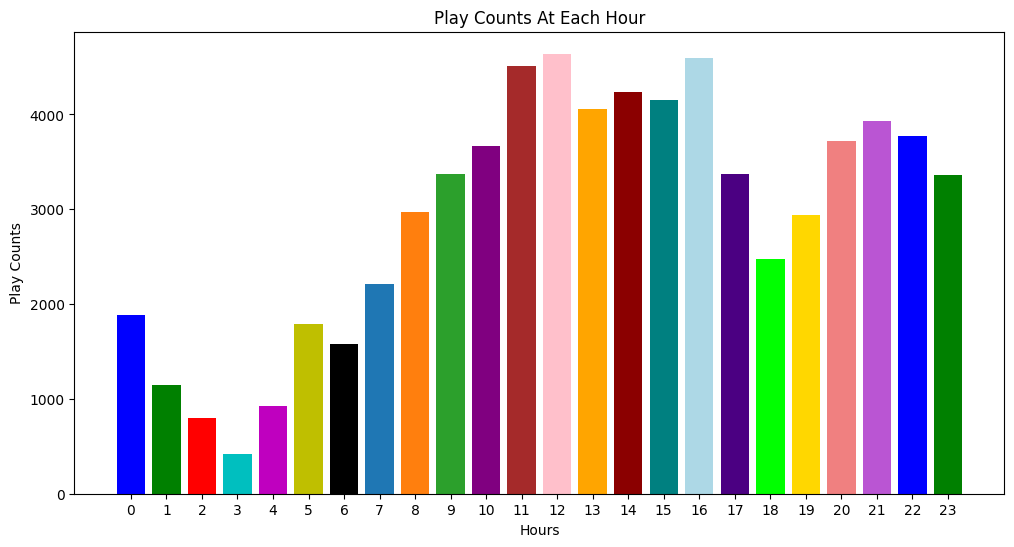

In [231]:
print(play_counts_at_hours)

keys = list(play_counts_at_hours.keys())
values = list(play_counts_at_hours.values())

# Create a column graph
colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k',   # Basic colors
    '#1f77b4', '#ff7f0e', '#2ca02c',      # Hexadecimal RGB values
    'purple', 'brown', 'pink', 'orange',  # Named colors
    'darkred', 'teal', 'lightblue', 'indigo',  # Additional colors
    'lime', 'gold', 'lightcoral', 'mediumorchid'  # More colors
]

plt.subplots(figsize=(12, 6))
plt.bar(keys, values, color=colors)

plt.xlabel('Hours')
plt.ylabel('Play Counts')
plt.title('Play Counts At Each Hour')
plt.xticks(keys)

plt.show()

{'2020': 11139, '2021': 15476, '2022': 19789, '2023': 15589}


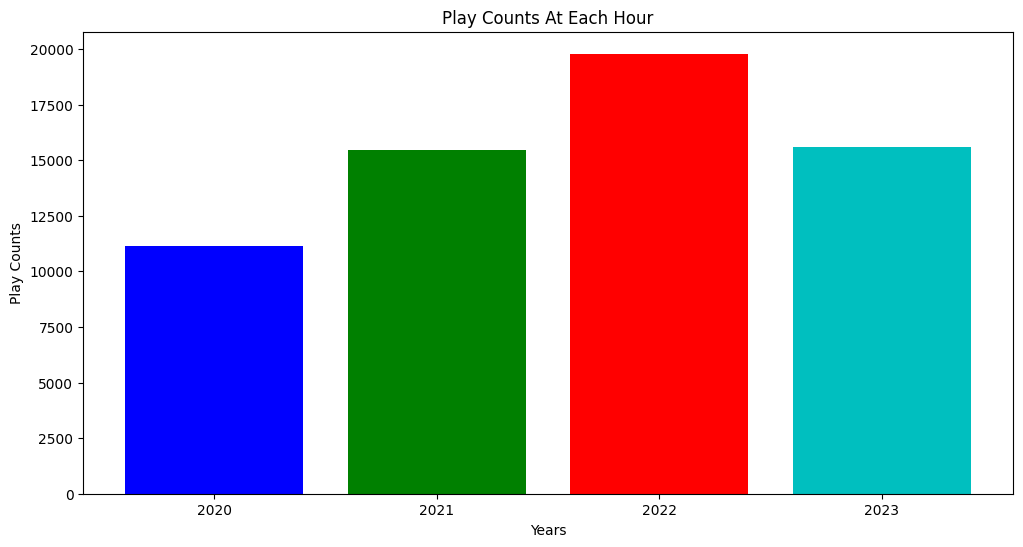

In [232]:
print(play_count_at_years)
keys = list(play_count_at_years.keys())
values = list(play_count_at_years.values())

# Create a column graph
colors = ['b', 'g', 'r', 'c',]

plt.subplots(figsize=(12, 6))
plt.bar(keys, values, color=colors)

plt.xlabel('Years')
plt.ylabel('Play Counts')
plt.title('Play Counts At Each Hour')
plt.xticks(keys)

plt.show()


In [233]:
duration_data_milliseconds = list(play_duration_daily.values())
duration_data_minutes = np.array([d/60000 for d in duration_data_milliseconds])


mean = np.mean(duration_data_minutes)
std_dev = np.std(duration_data_minutes)
sum_minutes = np.sum(duration_data_minutes)
sum_hour = sum_minutes/60
sum_days = sum_hour/24

print(f"Mean: {mean}")
print(f"Standard deviation: {std_dev}")
print(f"Sum (in minutes): {int(sum_minutes)}")
print(f"Sum (in hours): {int(sum_hour)}")
print(f"Sum (in days): {int(sum_days)}")

Mean: 80.75596496306886
Standard deviation: 59.842869965678666
Sum (in minutes): 112977
Sum (in hours): 1882
Sum (in days): 78


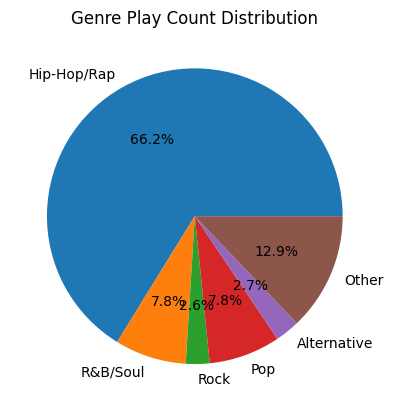

In [234]:
# Extract genre names and play counts
genre_names = list(play_count_genre.keys())
play_counts = list(play_count_genre.values())

# Calculate the total play count
total_play_count = sum(play_counts)

# Identify genres with less than 5% and group them into "Other"
threshold_percentage = 2
other_genre_counts = [count if count / total_play_count >= threshold_percentage / 100 else 0 for count in play_counts]
other_genre_name = 'Other'
other_genre_count = total_play_count - sum(other_genre_counts)

# Remove genres with less than 5% from the lists
filtered_genre_names = [genre for genre, count in zip(genre_names, other_genre_counts) if count != 0]
filtered_play_counts = [count for count in other_genre_counts if count != 0]

# Append the "Other" category
filtered_genre_names.append(other_genre_name)
filtered_play_counts.append(other_genre_count)

# Create a pie chart
plt.pie(filtered_play_counts, labels=filtered_genre_names, autopct='%1.1f%%')
plt.title('Genre Play Count Distribution')
plt.show()

**Hypothesis Testing**

In [242]:
# Hypothesis testing

#The hypothesis test can only be done on the tracks that are included in my library. Not every song has the released year value.

years = ["2020","2021","2022","2023"]

# Create an empty DataFrame for the contingency table
contingency_df = pd.DataFrame(index=years, columns=["Released in the Same Year", "Total Play Count"]).fillna(0)


# Fill contingency table
for track in play_history:
    if track['Released Year'] != None:
        released_year = str(track['Released Year'])
        played_year = track['Played Year']
        if released_year != played_year:
            contingency_df.loc[played_year,'Total Play Count'] += 1
        else :
             contingency_df.loc[played_year,'Released in the Same Year'] += 1
             contingency_df.loc[played_year,'Total Play Count'] += 1

print(contingency_df)

      Released in the Same Year  Total Play Count
2020                       1010              9949
2021                       1330             14564
2022                       1679             17420
2023                        819             12827


**Pearson Correlation**

Pearson Correlation Coefficient: 0.829272294288362
P-value: 0.17072770571163787
There is no significant correlation.


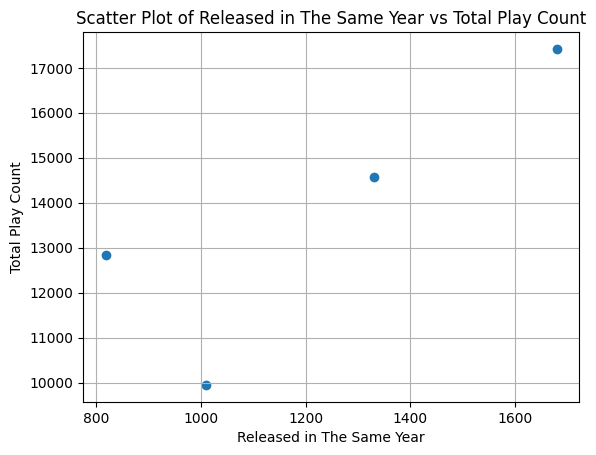

In [243]:
from scipy.stats import pearsonr

played_and_released_in_the_same_year = contingency_df["Released in the Same Year"].tolist()
total_play_counts_for_every_year = contingency_df["Total Play Count"].tolist()

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(played_and_released_in_the_same_year, total_play_counts_for_every_year)

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check for significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant correlation.")
else:
    print("There is no significant correlation.")

# Scatter plot
plt.scatter(played_and_released_in_the_same_year, total_play_counts_for_every_year)
plt.title("Scatter Plot of Released in The Same Year vs Total Play Count")
plt.xlabel("Released in The Same Year")
plt.ylabel("Total Play Count")
plt.grid(True)
plt.show()